In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from society.agent import Agent, TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.selection.greedy import (
    EGreedySelectionStrategy,
    GreedySelectionStrategy,
)
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.strategies.selection.random import RandomSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


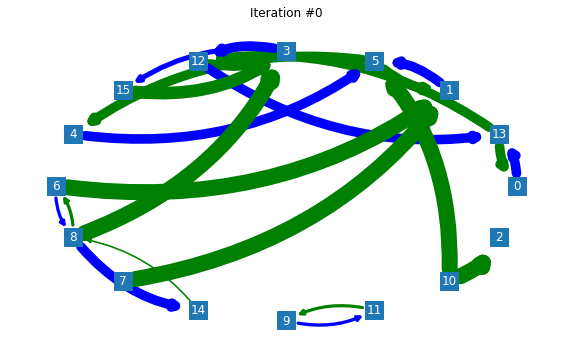

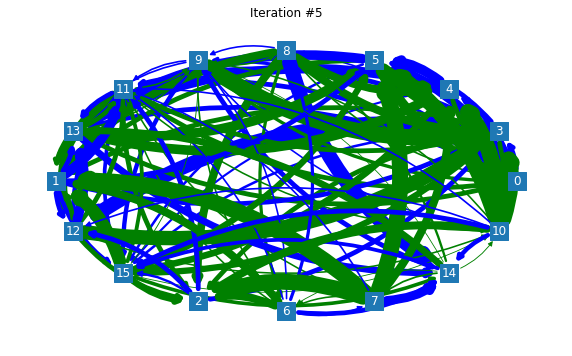

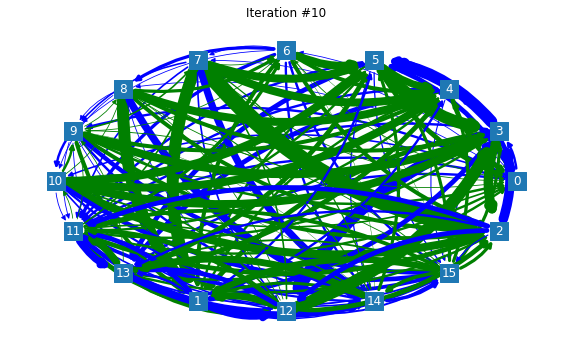

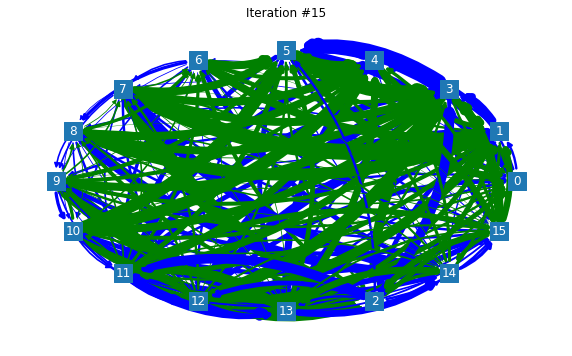

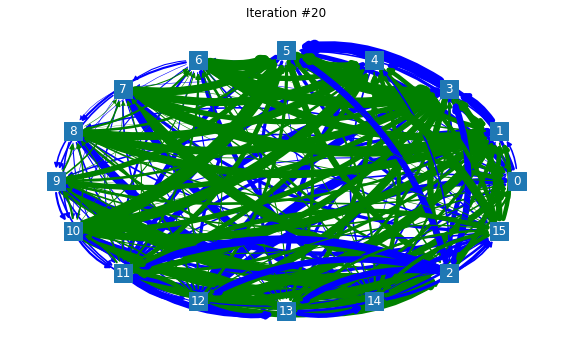

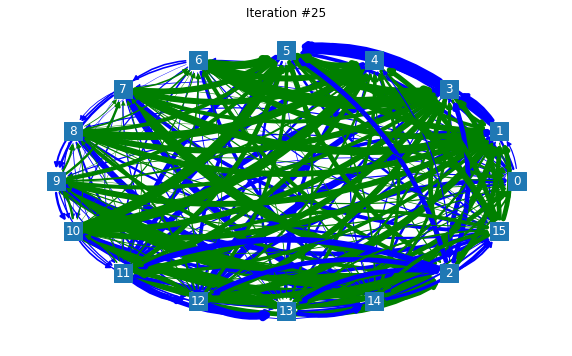

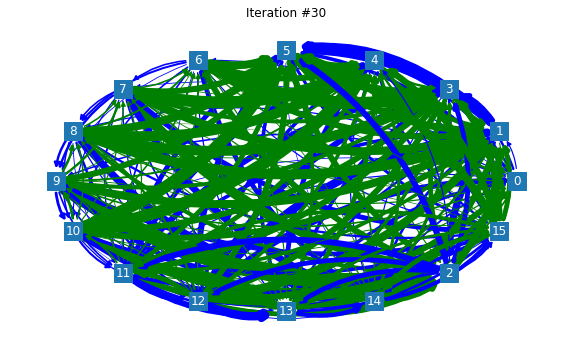

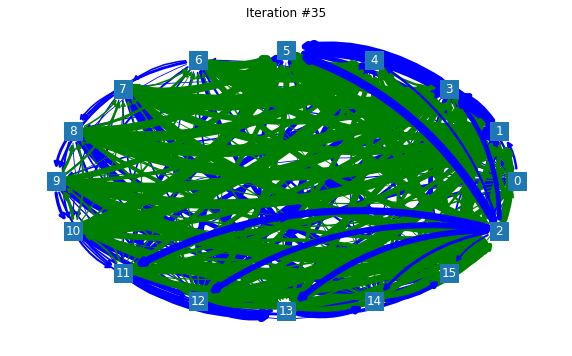

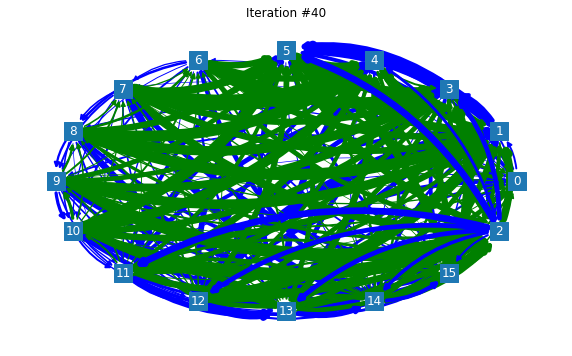

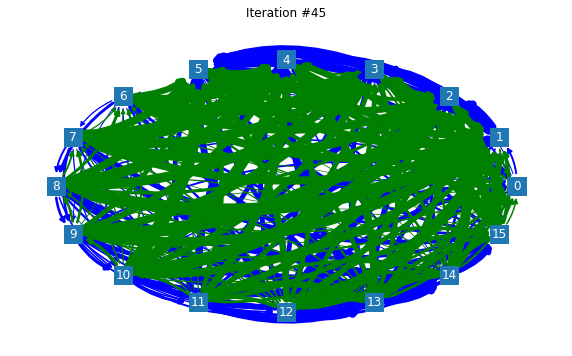

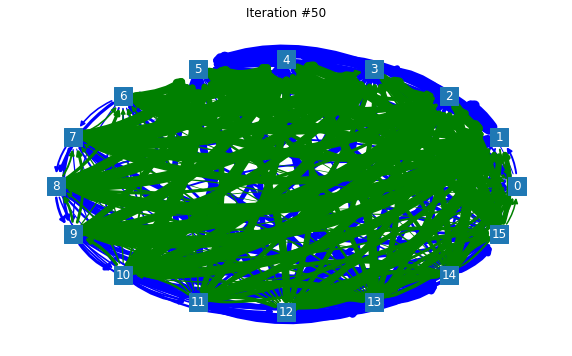

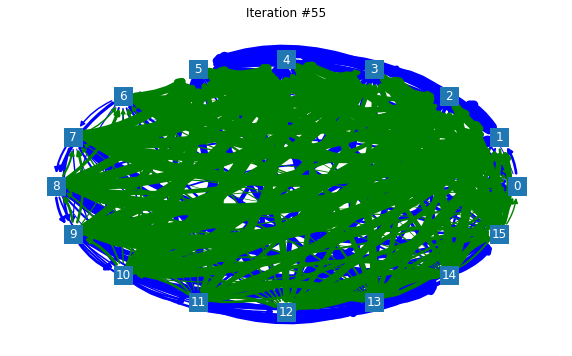

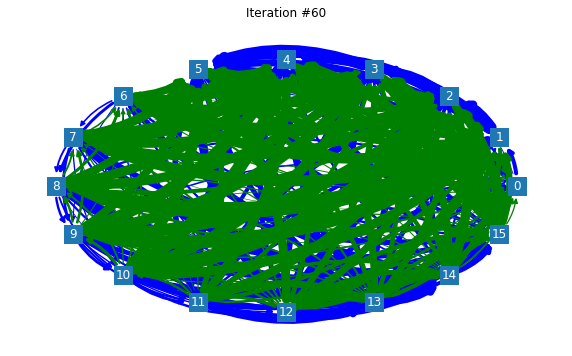

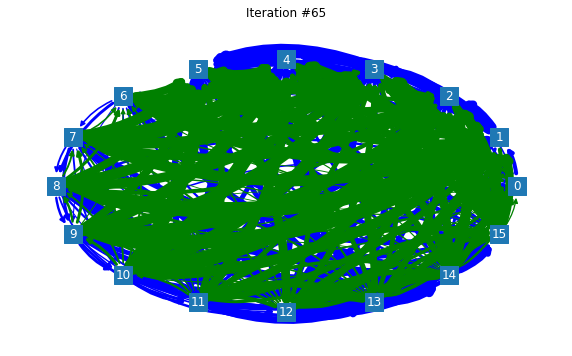

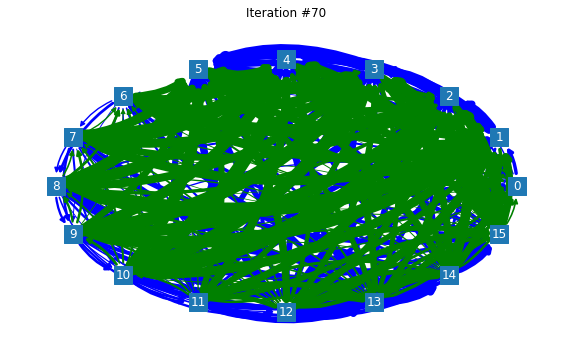

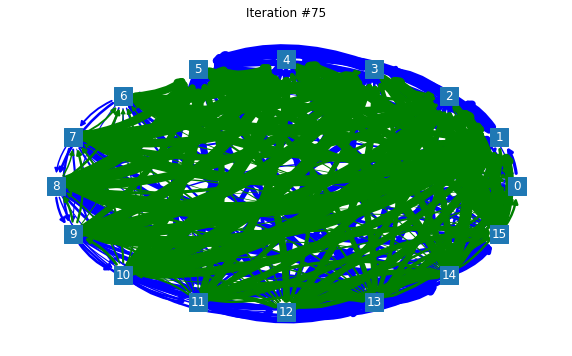

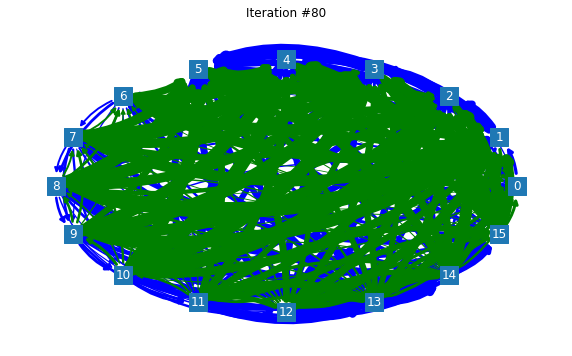

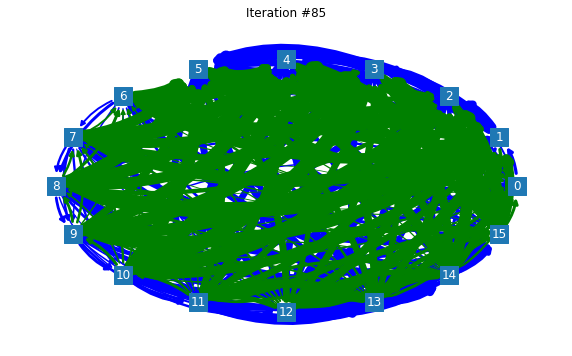

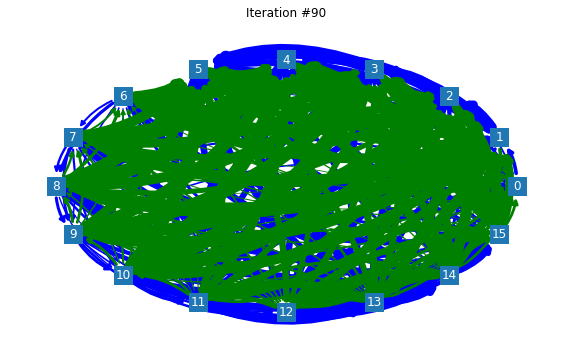

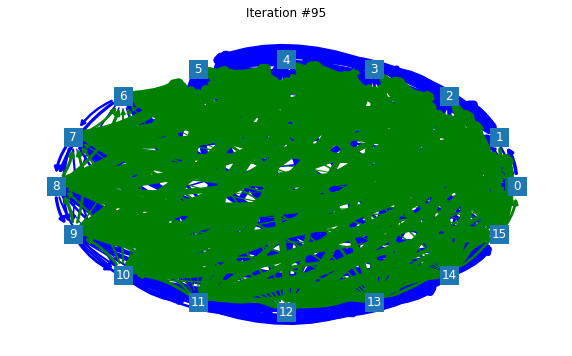

In [2]:
POPULATION = 16
ts = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
os.makedirs(f"images/{ts}")

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), TitForTat()),
    Agent(EGreedySelectionStrategy(), TitForTat()),
    Agent(EGreedySelectionStrategy(), TitForTat()),
    Agent(RandomSelectionStrategy(), RandomGameplayStrategy()),
    Agent(RandomSelectionStrategy(), RandomGameplayStrategy()),
]

agents[0].selection_strategy._epsilon = 0.25

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(101):
    sim.play_round()

    if (i < 100 and i % 5 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")
        plt.savefig(f"images/{ts}/{i}.png")
        # plt.show()


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15      
0: 0        1800     1200     1800     3000     2700     495      594      1089     792      891      2100     2700     1500     1376     1590     => 23627
1: 1800     0        4200     3300     3900     3900     0        0        0        0        0        4500     5400     2700     1428     1725     => 32853
2: 1200     4200     0        3000     2400     4800     0        0        0        0        0        3300     4500     5100     2472     2136     => 33108
3: 1800     3300     3000     0        3000     6600     0        0        0        0        0        3000     4200     3300     1488     2268     => 31956
4: 3000     3900     2400     3000     0        4200     0        0        0        0        0        4500     3000     3900     1386     2394     => 31680
5: 2700     3900     4800     6600     4200     0        0        0      

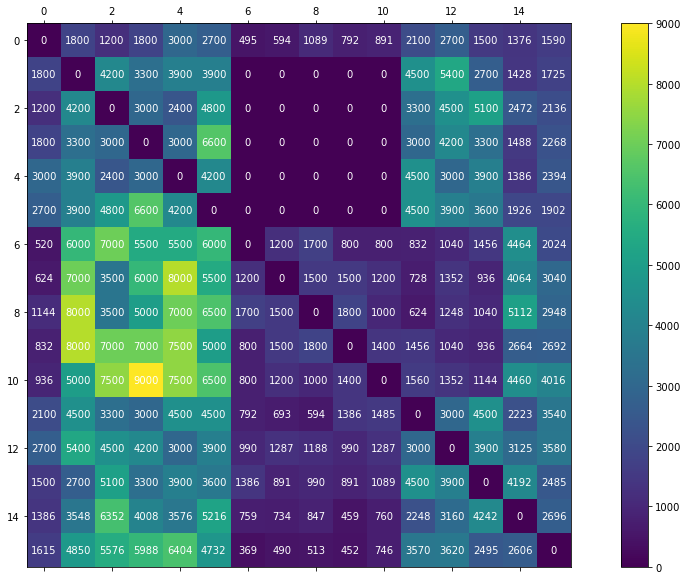

In [4]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
m = ax.matshow(returns_matrix)
fig.colorbar(m)

for (i, j), z in np.ndenumerate(returns_matrix):
    ax.text(
        j,
        i,
        "{:0.0f}".format(z),
        ha="center",
        va="center",
        color="white"
    ) # bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')


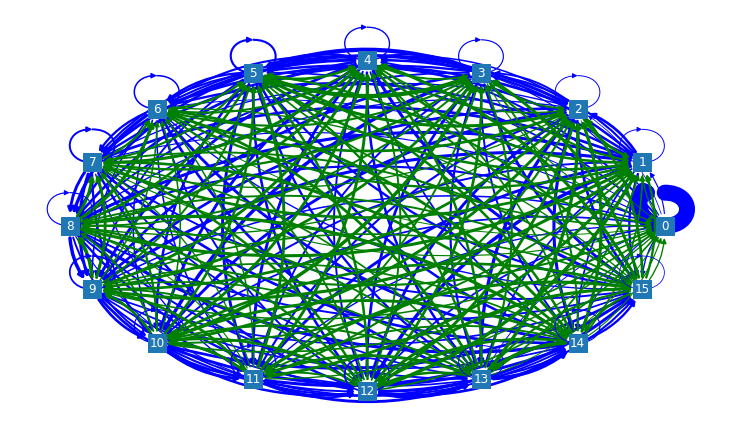

In [5]:
plot_graph(make_frequencies_graph(sim.returns))

In [6]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15      
0: 83       6        4        6        10       9        5        6        11       8        9        7        9        5        6        7        => 191
1: 6        5        14       11       13       13       12       14       16       16       10       15       18       9        9        12       => 193
2: 4        14       5        10       8        16       14       7        7        14       15       11       15       17       16       14       => 187
3: 6        11       10       6        10       22       11       12       10       14       18       10       14       11       10       15       => 190
4: 10       13       8        10       7        14       11       16       14       15       15       15       10       13       9        16       => 196
5: 9        13       16       22       14       11       12       11       13      